In [2]:
import numpy as np
import pandas as pd
import requests
import io

from scipy.integrate import odeint
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

In [3]:
# methodology follows Michael Lin: https://drive.google.com/file/d/1ZaiDO87me4puBte-8VytcSRtpQ3PVpkK/view
# infected fatality rate: https://www.eurosurveillance.org/content/10.2807/1560-7917.ES.2020.25.12.2000256
ifr = .009

cfr = .02

In [5]:
states = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
counties = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
csv = requests.get(counties).text

df = pd.read_csv(io.StringIO(csv), parse_dates=['date'])

In [6]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [7]:
df.loc[df['state'] == 'California', 'county'].unique()

array(['Orange', 'Los Angeles', 'Santa Clara', 'San Francisco',
       'San Diego', 'Humboldt', 'Sacramento', 'Solano', 'Marin', 'Napa',
       'Sonoma', 'Alameda', 'Placer', 'San Mateo', 'Contra Costa', 'Yolo',
       'Fresno', 'Madera', 'Riverside', 'Santa Cruz', 'Shasta',
       'San Joaquin', 'Ventura', 'Stanislaus', 'Tulare', 'San Benito',
       'San Luis Obispo', 'San Bernardino', 'Santa Barbara', 'Nevada',
       'Kern', 'Monterey', 'Mendocino', 'Amador', 'Imperial', 'Butte',
       'El Dorado', 'Siskiyou', 'Yuba', 'Unknown', 'Calaveras', 'Merced',
       'Mono', 'Inyo', 'Sutter', 'Colusa', 'Kings', 'Glenn', 'Tuolumne',
       'Alpine'], dtype=object)

In [8]:
# df_filt = df[(df['state'] == 'California')].copy()
df_filt = df.copy()

In [9]:
ts_cases = df_filt.groupby('date')['cases'].sum()

In [10]:
ts = df_filt.groupby('date')['deaths'].sum()
# ts = ts[ts > 10]
# ts.index = ts.index - pd.DateOffset(days=14)
ts_growth = (ts - ts.shift(1)) / ts.shift(1)
# ts_growth.index = ts_growth.index - pd.DateOffset(days=14)

In [11]:
ts

date
2020-01-21       0
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
2020-01-27       0
2020-01-28       0
2020-01-29       0
2020-01-30       0
2020-01-31       0
2020-02-01       0
2020-02-02       0
2020-02-03       0
2020-02-04       0
2020-02-05       0
2020-02-06       0
2020-02-07       0
2020-02-08       0
2020-02-09       0
2020-02-10       0
2020-02-11       0
2020-02-12       0
2020-02-13       0
2020-02-14       0
2020-02-15       0
2020-02-16       0
2020-02-17       0
2020-02-18       0
2020-02-19       0
2020-02-20       0
2020-02-21       0
2020-02-22       0
2020-02-23       0
2020-02-24       0
2020-02-25       0
2020-02-26       0
2020-02-27       0
2020-02-28       0
2020-02-29       1
2020-03-01       3
2020-03-02       6
2020-03-03      10
2020-03-04      12
2020-03-05      12
2020-03-06      15
2020-03-07      19
2020-03-08      22
2020-03-09      26
2020-03-10      31
2020-03-11      37
2020-03-12      43
2020-03

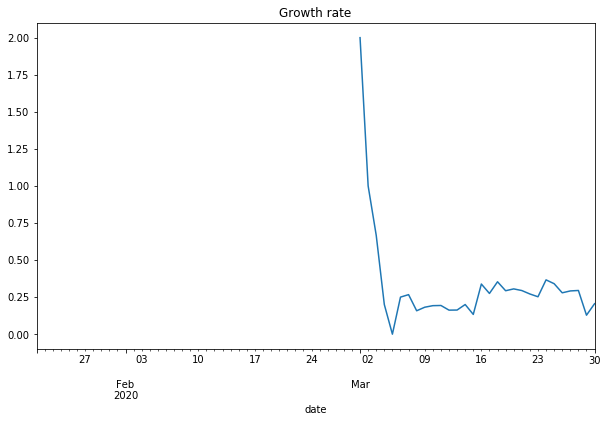

In [12]:
ts_growth.plot(title='Growth rate', figsize=(10, 6))

In [13]:
growth_rate_mean, growth_rate_std = ts_growth.agg(['mean', 'std'])
print(growth_rate_mean, growth_rate_std)

inf nan


In [14]:
(1 + growth_rate_mean) ** 7

inf

In [15]:
ts / ifr

date
2020-01-21         0.000000
2020-01-22         0.000000
2020-01-23         0.000000
2020-01-24         0.000000
2020-01-25         0.000000
2020-01-26         0.000000
2020-01-27         0.000000
2020-01-28         0.000000
2020-01-29         0.000000
2020-01-30         0.000000
2020-01-31         0.000000
2020-02-01         0.000000
2020-02-02         0.000000
2020-02-03         0.000000
2020-02-04         0.000000
2020-02-05         0.000000
2020-02-06         0.000000
2020-02-07         0.000000
2020-02-08         0.000000
2020-02-09         0.000000
2020-02-10         0.000000
2020-02-11         0.000000
2020-02-12         0.000000
2020-02-13         0.000000
2020-02-14         0.000000
2020-02-15         0.000000
2020-02-16         0.000000
2020-02-17         0.000000
2020-02-18         0.000000
2020-02-19         0.000000
2020-02-20         0.000000
2020-02-21         0.000000
2020-02-22         0.000000
2020-02-23         0.000000
2020-02-24         0.000000
2020-02-25     

In [16]:
growth_rate = average_growth_rate
# growth_rate = .
num_days = 14

ts_proj = pd.Series(data=(ts[-1] / ifr) * (1 + growth_rate) ** np.arange(1, num_days + 1),
                    index=pd.date_range(start=ts.index.max() + pd.DateOffset(days=1), periods=num_days, freq='D'))
                       

NameError: name 'average_growth_rate' is not defined

In [17]:
ts_combined = (ts / ifr).append(ts_proj)
ts_combined.plot(title='Estimated true case count', figsize=(10, 6))

NameError: name 'ts_proj' is not defined

In [18]:
ts_combined

NameError: name 'ts_combined' is not defined

In [19]:
df_cases = ts_combined.to_frame(name='cases_estimate').join(ts_cases.to_frame(name='cases'))

NameError: name 'ts_combined' is not defined

In [20]:
df_cases

NameError: name 'df_cases' is not defined

In [21]:
((df_cases['cases'] / (ifr / cfr)) / df_cases['cases_estimate']).plot()

NameError: name 'df_cases' is not defined